In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

sns.set_style("darkgrid")

### Loading data

In [109]:
df = pd.read_csv('housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      991 non-null    float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     998 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


### EDA

In [110]:
df.describe()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,991.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,-119.508740,35.604810,27.62500,2736.217000,557.273461,1471.59000,515.909000,3.955882,207767.443000
std,288.819436,1.960951,2.139722,12.27253,2179.854484,426.100791,1123.21073,384.781423,1.940355,113675.832278
min,1.000000,-124.190000,32.560000,2.00000,19.000000,11.000000,34.00000,9.000000,0.536000,14999.000000
25%,250.750000,-121.520000,33.910000,17.75000,1484.500000,301.500000,805.75000,287.750000,2.625000,119900.000000
50%,500.500000,-118.480000,34.255000,27.50000,2214.000000,449.000000,1199.50000,426.500000,3.692600,184350.000000
75%,750.250000,-118.030000,37.700000,36.00000,3260.000000,668.500000,1803.75000,626.000000,4.856800,261950.000000
max,1000.000000,-115.410000,41.780000,52.00000,27700.000000,4386.000000,15037.00000,4072.000000,15.000100,500001.000000


In [111]:
# get null values count by column
df.isna().sum()

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        9
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       2
dtype: int64

As we can see there are null values detected in 2 columns - `total_bedrooms` and `ocean_proximity`. We will deal with missing values in Data Cleaning section later.

In [112]:
df = df.drop('No.', axis=1) # remove index column from the dataframe

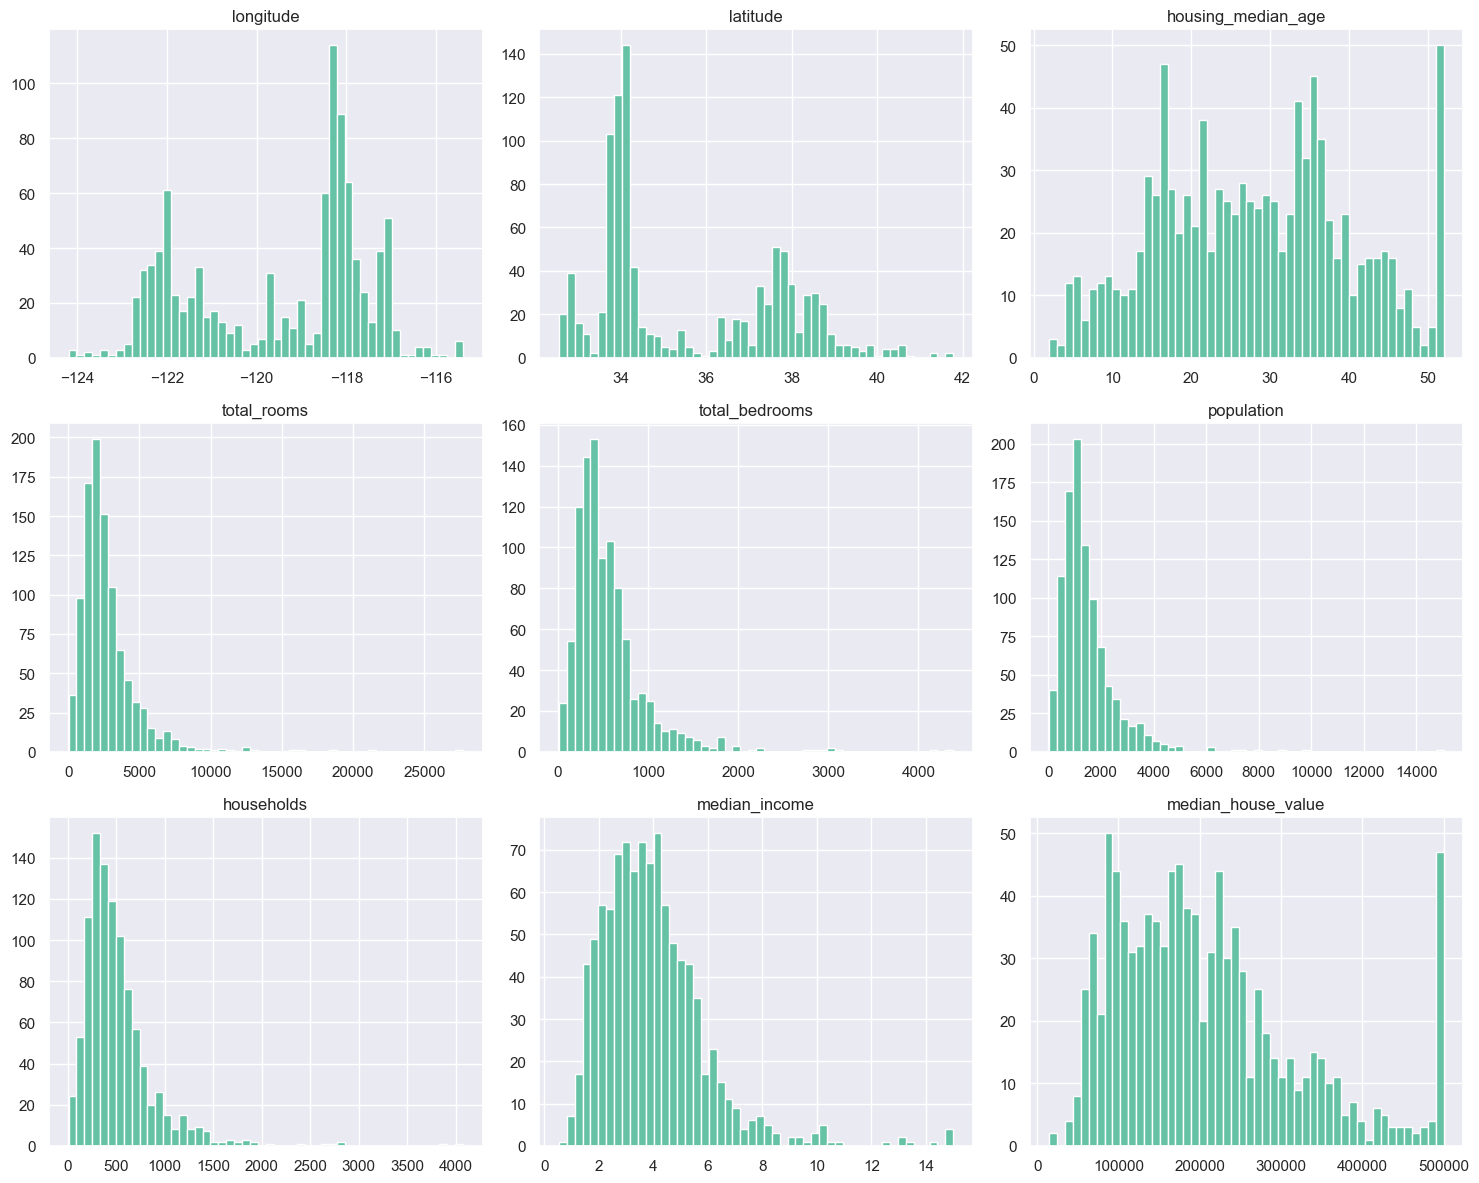

In [113]:
sns.set_theme(palette='Set2')

df.hist(bins=50, figsize=(15, 12))
plt.tight_layout()
plt.show()

#### Correlation

In [114]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924460,0.006347,0.028014,0.069022,0.100287,0.054090,-0.050625,-0.042019
latitude,-0.924460,1.000000,-0.081421,-0.026028,-0.069933,-0.112555,-0.072432,-0.051068,-0.160713
housing_median_age,0.006347,-0.081421,1.000000,-0.393211,-0.342564,-0.311728,-0.325981,-0.147825,0.106038
total_rooms,0.028014,-0.026028,-0.393211,1.000000,0.934881,0.873056,0.926551,0.157330,0.093554
total_bedrooms,0.069022,-0.069933,-0.342564,0.934881,1.000000,0.889484,0.978943,-0.045696,0.013277
population,0.100287,-0.112555,-0.311728,0.873056,0.889484,1.000000,0.921097,-0.025071,-0.035675
households,0.054090,-0.072432,-0.325981,0.926551,0.978943,0.921097,1.000000,-0.019544,0.033697
median_income,-0.050625,-0.051068,-0.147825,0.157330,-0.045696,-0.025071,-0.019544,1.000000,0.671420
median_house_value,-0.042019,-0.160713,0.106038,0.093554,0.013277,-0.035675,0.033697,0.671420,1.000000


<Axes: >

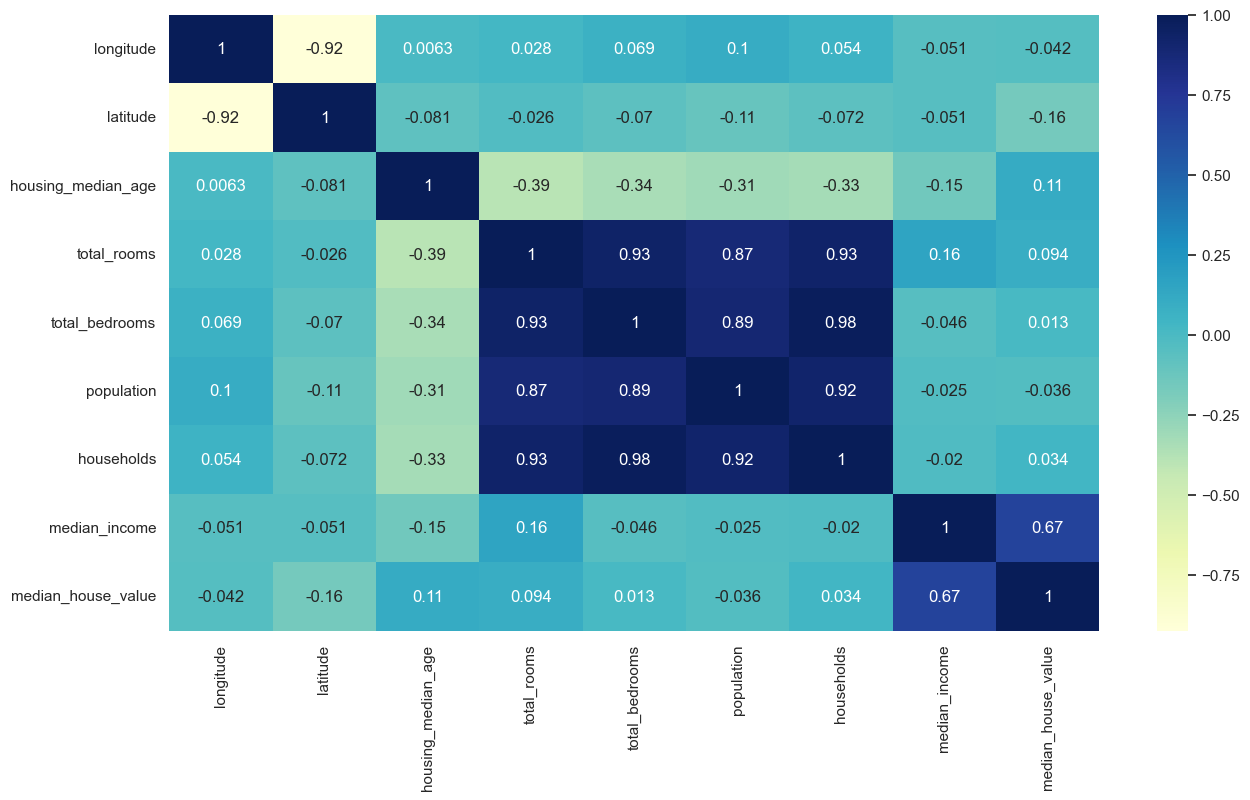

In [115]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

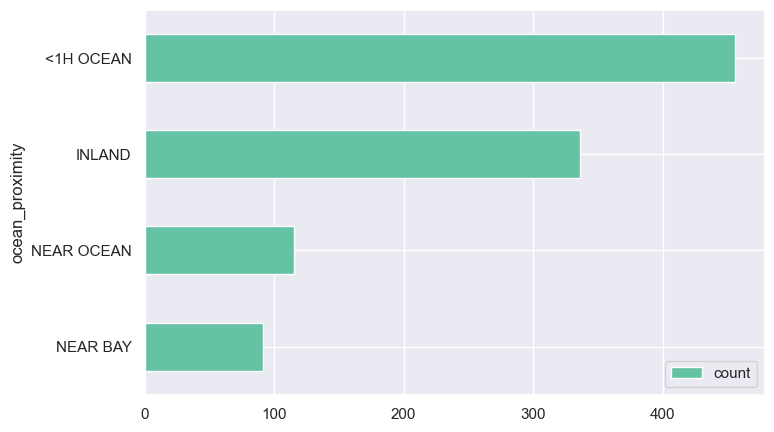

In [116]:
df.ocean_proximity.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,5))
plt.legend()

In [117]:
test_df = pd.get_dummies(data=df['ocean_proximity'], dtype=int)
test_df

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
995,0,1,0,0
996,0,1,0,0
997,0,1,0,0
998,0,1,0,0


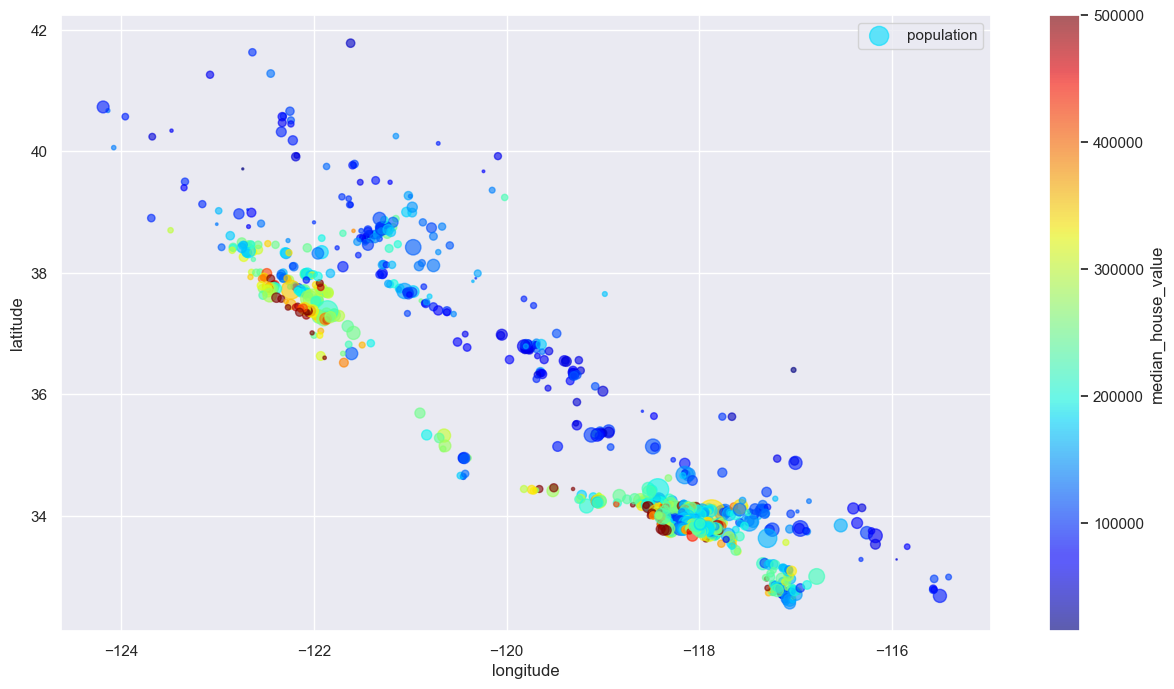

In [118]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.6,
            s=df['population'] / 40, label="population", figsize=(15,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.show()

In [119]:
fig = px.scatter_mapbox(df, title="Geographical Distribution", lat='latitude', lon='longitude',
                        hover_name='ocean_proximity',
                        color='median_house_value',
                        size='population',
                        zoom=4, height=600)

# Update the map style
fig.update_layout( mapbox_style="open-street-map")

# Show the plot
fig.show()

### Data Splitting

In [120]:
X = df.drop(['median_house_value'], axis=1) 	# features
y = df['median_house_value'] 				    # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Feature Engineering

In [121]:
def feature_engineering(data):
	data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
	data['population_per_household'] = data['population'] / data['households']
	data['rooms_per_household'] = data['total_rooms'] / data['households']

	return data

# Add feature engineering on training and test data
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

### Data Cleaning (imputation)

We've spotted few missing values in our data (NaNs), so the question is what to do about them - as we can't run our ML models with NaN values. Much like the outlier question, there is no one 'correct' way to approach this. If you have lots of data, maybe you feel you can get away with just removing the rows with incomplete data entirely. On the other end of the scale, maybe you will go and do more research to find out the missing values, or even use other models/statistics to work out the most likely value.

However, probably the easiest and most common approach is to use a naive imputation strategy.

This is done in a similar manner to the feature scaling done last week - we need to create a [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) object, `fit` this to our training data only, then use this to `transform` our train AND test data.

Note, there are 4 types of imputing:
1. 'mean' - Numerical only, replaces missing values with the mean value for the feature.
2. 'median'- Numerical only, replaces missing values with the median value for the feature.
3. 'most frequent'- Numerical and categorical, replaces missing values with the most frequent (mode) value/string observed.
4. 'constant' - Numerical and categorical, replaces missing values with a defined constant value.

For this case, we are going to use a `median` encoder on our numeric columns, and a `most_frequent` strategy for our categorical columns. 

In [122]:
from sklearn.impute import SimpleImputer

# To apply the different imputers, we first have to split our data into seperate numerical and categorical data
X_train_numerical = X_train.select_dtypes(include=np.number)
X_train_categorical = X_train.select_dtypes(exclude=np.number)

# Create our imputer objects
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputers on the training data
numeric_imputer.fit(X_train_numerical)
categorical_imputer.fit(X_train_categorical)

# Transform the columns
X_train_numerical_imp = numeric_imputer.transform(X_train_numerical)
X_train_categorical_imp = categorical_imputer.transform(X_train_categorical)

# We also need to split and transform our test data
X_test_numerical = X_test.select_dtypes(include=np.number)
X_test_categorical = X_test.select_dtypes(exclude=np.number)
X_test_numerical_imp = numeric_imputer.transform(X_test_numerical)
X_test_categorical_imp = categorical_imputer.transform(X_test_categorical)

### Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

# Scaler Object
scaler = StandardScaler()

# Fit on the numeric training data
scaler.fit(X_train_numerical_imp)

# Transform the training and test data
X_train_num_scaled = scaler.transform(X_train_numerical_imp)
X_test_num_scaled = scaler.transform(X_test_numerical_imp)

### Categorical Feature Encoding

While we don't need to scale our categorical features, we still need to convert them into numerical values that our ML models can use. There are a few ways the problem of categorical features can be approached, but for now we will focus only on [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). For each feature, this expands the columns in the dataset to have one column per category using a 0/1 indicator to mark which category is true for each data point.

This is genrally considered a better solution than basic label encoding, as there is no ordering/scale between the categories being implied. However, there is actually is no benefit to using OHE for categorical features with only two catgories (as you will just end up with two columns where the 1's and 0's are inverted, which adds nothing to the model) and OHE can also cause an issue by causing the dimensionality of the data to increase, which brings it's own set of issues.

In [124]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder object
encoder = OneHotEncoder(sparse_output=False)

# Fit encoder on the training data
encoder.fit(X_train_categorical_imp)

# Transform the test and train data
X_train_onehot = encoder.transform(X_train_categorical_imp)
X_test_onehot = encoder.transform(X_test_categorical_imp)

In [125]:
X_train = np.concatenate([X_train_num_scaled, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_scaled, X_test_onehot], axis=1)

# We can see the scaled test results and the OHE category columns now.
X_train

array([[-1.62319912,  1.21995571, -0.91641611, ...,  0.        ,
         1.        ,  0.        ],
       [-1.67131153,  1.41552607,  0.60860303, ...,  0.        ,
         1.        ,  0.        ],
       [-1.67665736,  1.42041533,  1.17045219, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.19553325,  1.3519657 ,  1.41124468, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17949578,  1.3519657 ,  1.89282967, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17949578,  1.36174422,  0.12701804, ...,  1.        ,
         0.        ,  0.        ]])

## Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

LinearRegression()

In [127]:
from sklearn.metrics import r2_score, root_mean_squared_error

# Make a prediction with the training data
y_pred_train = linear_regressor.predict(X_train)

# Make predictions using the testing set
y_pred = linear_regressor.predict(X_test)

# The mean squared error loss and R2 for the test and train data
print('Train - RMSE: {:.4f} R2 score: {:.4f}'.format(root_mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train)))
print('Test - RMSE: {:.4f} R2 score: {:.4f}'.format(root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

Train - RMSE: 66641.0149 R2 score: 0.6332
Test - RMSE: 76859.8812 R2 score: 0.6300


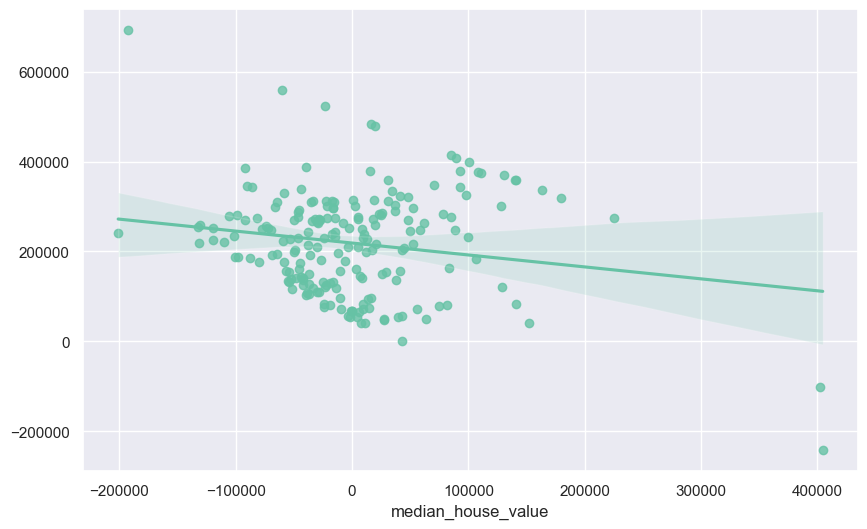

In [128]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.regplot(x=residuals, y=y_pred)
plt.show()

In [130]:
original_values = y_test[:5]
predicted_values = y_pred[:5]
comparision_dataframe = pd.DataFrame(data = { "Original values": original_values, "Predicted values": predicted_values })
comparision_dataframe['Differences']= comparision_dataframe['Original values'] - comparision_dataframe['Predicted values']

comparision_dataframe

,Original values,Predicted values,Differences
800,128800,193646.266956,-64846.266956
801,154800,191204.474470,-36404.474470
802,91100,128430.862033,-37330.862033
803,100000,143499.594976,-43499.594976
804,162500,80533.979323,81966.020677


Not good at all. Shit!

## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
tree_regressor.score(X_test, y_test)

0.5618602128467016

In [133]:
from sklearn.metrics import r2_score, root_mean_squared_error

# Make a prediction with the training data
y_pred_train = tree_regressor.predict(X_train)

# Make predictions using the testing set
y_pred = tree_regressor.predict(X_test)

# The mean squared error loss and R2 for the test and train data
print('Train - RMSE: {:.4f} R2 score: {:.4f}'.format(root_mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train)))
print('Test - RMSE: {:.4f} R2 score: {:.4f}'.format(root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

Train - RMSE: 0.0000 R2 score: 1.0000
Test - RMSE: 83634.4267 R2 score: 0.5619


<Axes: >

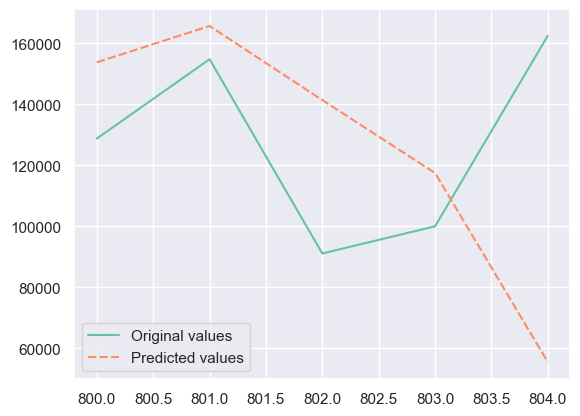

In [134]:
original_values = y_test[:5]
predicted_values = y_pred[:5]
comparision_dataframe = pd.DataFrame(data = { "Original values": original_values, "Predicted values": predicted_values })
comparision_dataframe['Differences']= comparision_dataframe['Original values'] - comparision_dataframe['Predicted values']

sns.lineplot(comparision_dataframe)

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)


rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

[95310.31960136 67822.64960939 96527.63217112 84238.38194411
 59499.72132319 95491.45608424 87706.07972099 52925.64690264
 85342.56440971 94181.14057556]
Mean:		  81904.55923422905 
Standard Deviation: 15231.038825344986


## Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()

forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
forest_regressor.score(X_test, y_test)

0.7032053156895421

In [137]:
from sklearn.metrics import r2_score, root_mean_squared_error

# Make a prediction with the training data
y_pred_train = forest_regressor.predict(X_train)

# Make predictions using the testing set
y_pred = forest_regressor.predict(X_test)

# The mean squared error loss and R2 for the test and train data
print('Train - RMSE: {:.4f} R2 score: {:.4f}'.format(root_mean_squared_error(y_train, y_pred_train), r2_score(y_train, y_pred_train)))
print('Test - RMSE: {:.4f} R2 score: {:.4f}'.format(root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

Train - RMSE: 21362.3643 R2 score: 0.9623
Test - RMSE: 68834.6006 R2 score: 0.7032


#### Hyperparameter tuning

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
]

- In `param_grid`, we are trying 3 [n_estimators] X 4 [max_features] = 12 combinations.
- We'll do a cross-validation(cv) of 5 folds

In [139]:
forest = RandomForestRegressor()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [140]:
best_forest_reg = grid_search.best_estimator_

In [141]:
best_forest_reg.score(X_test, y_test)

0.7003024244471993